In [1]:
import numpy as np
import matplotlib.pylab as plt
import h5py
import random as rd
#%matplotlib widget

In [2]:
#da isteddas
dens0 = [2704.43, 4272.43, 4299.07, 2753.97, 1801.22, 907.499, 369.92, 96.908, 22.0353, 2.50816]
min0 =-3.38581  
max0 =1.20835
step0 =0.459415
binning0 = np.arange(min0,max0,step0)
data = np.loadtxt("bin_ist.txt", dtype=int)
unique, counts = np.unique(data, return_counts=True)

dens1 = [3070.74389648438, 1483.13122558594, 492.838562011719, 240.511123657227, 72.6780242919922, 13.7682065963745, 0.794899225234985, 0.0293863620609045, 0.00236009783111513, 9.58721138886176e-05]
min1 =-2.98138809204102  
max1=3.8819432258606
step1=0.686333119869232
binning1 = np.arange(min1,max1,step1)
data1 = np.loadtxt("bin_ist_end.txt", dtype=int)
unique1, counts1 = np.unique(data1, return_counts=True)


dens0_N = [749250752, 12544125, 3675297.75, 769160.9375, 77724.9296875, 6698.9462890625, 402.857727050781, 16.693265914917, 0.494035065174103, 0.00561265740543604]
min0_N =-3.38581
max0_N =1.20835
step0_N =0.459415
binning0_N = np.arange(min0_N,max0_N,step0_N)
data_N = np.loadtxt("bin_ist_N.txt", dtype=int)
unique_N, counts_N = np.unique(data_N, return_counts=True)

#dens1_N = [1216193.125, 81955.2734375, 3263.64477539062, 99.2721939086914, 1.5703672170639, 0.0119649013504386, 4.48262762802187e-05, 1.68797456012726e-07, 1.0673941730488e-09, 3.84055200836064e-12]
dens1_N = [2772606.25, 138635.5, 8429.3427734375, 245.125457763672, 3.86003828048706, 0.0269546769559383, 9.04068147065118e-05, 2.49598684831653e-07, 1.44217959796578e-09, 4.43764166038751e-12]
min1_N =-2.78720879554749
max1_N =3.87940502166748
step1_N =0.666661381721497
binning1_N = np.arange(min1_N,max1_N,step1_N)
data1_N = np.loadtxt("bin_ist_N_end.txt", dtype=int)
unique1_N, counts1_N = np.unique(data1_N, return_counts=True)

dens0_m = [0.449506640434265, 0.522700667381287, 0.983871102333069, 1.4537011384964, 1.09109425544739, 0.533714294433594, 0.215090394020081, 0.0585004314780235, 0.012255409732461, 0.00118815165478736]
min0_m =-3.9105 
max0_m =1.21116 
step0_m =0.512166
binning0_m = np.arange(min0_m,max0_m,step0_m)

dens1_m = [7.61614513397217, 4.18823051452637, 3.1158721446991, 2.12180733680725, 0.225185081362724, 0.0507202036678791, 0.00595832290127873, 0.000142632692586631, 2.03281160793267e-06, 3.4806660664799e-08]
min1_m =-4.95788955688477  
max1_m =3.88075160980225
step1_m =0.883864104747772
binning1_m = np.arange(min1_m,max1_m,step1_m)

nbins = len(dens0)
direc = '/home/matti/programming/isteddas/cmake-build-debug/bin/output/'
name = 'snapshots'
h = h5py.File(direc + name, 'r')
# for key in h.keys():
#     print('dataset = %s'%key)
s0 = h.get('snapshot_0/corrected')[...]
sf = h.get('snapshot_21/corrected')[...]
h.close()

#x:y:z:vx:vy:vz:m:bl_i:bl_n:bl_c_i:bl_c_n:localtime
x0 = s0[:,0]
y0 = s0[:,1]
z0 = s0[:,2]
vx0 = s0[:,3]
vy0 = s0[:,4]
vz0 = s0[:,5]
m0 = s0[:,6]
xf = sf[:,0]
yf = sf[:,1]
zf = sf[:,2]
vxf = sf[:,3]
vyf = sf[:,4]
vzf = sf[:,5]
mf = sf[:,6]
del(s0, sf)

f = open(direc + 'diagnostic.dat')
file=f.readlines()
f.close()
file.pop(0)
error = np.loadtxt(file)

N = x0.shape[0]
print(N)

2048


In [3]:
n = 2
lw = 2
fs = 'xx-large'
# %matplotlib inline

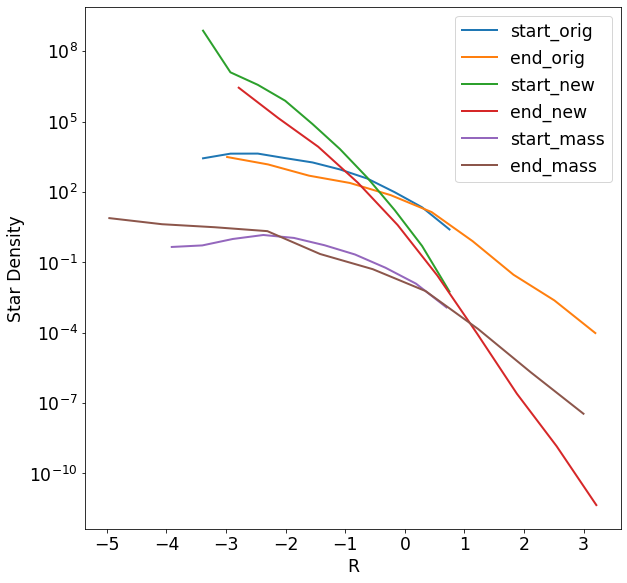

In [9]:
fig = plt.figure(0, figsize=[n*4.8,n*4.8])
ax = plt.gca()
p = ax.plot
_ = p(binning0[0:nbins], dens0, lw=lw, label='start_orig')
_ = p(binning1[0:nbins], dens1, lw=lw, label='end_orig')
_ = p(binning0_N[0:nbins], dens0_N, lw=lw, label='start_new')
_ = p(binning1_N[0:nbins], dens1_N, lw=lw, label='end_new')
_ = p(binning0_m[0:nbins], dens0_m, lw=lw, label='start_mass')
_ = p(binning1_m[0:nbins], dens1_m, lw=lw, label='end_mass')
_ = ax.set_yscale('log')
# _ = ax.set_xscale('log')
_ = plt.legend(fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.xlabel('R', fontsize=fs)
_ = plt.ylabel('Star Density',fontsize=fs)

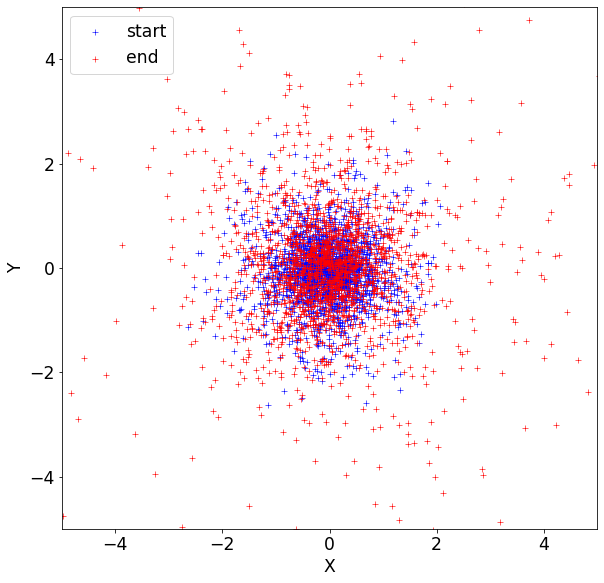

In [38]:
y0_p = np.zeros_like(y0)
for i in range(N):
    if(y0[i]>0):
        y0_p[i] = y0[i]
    else:
        y0_p[i] = 1000

fig = plt.figure(1, figsize=[n*4.8,n*4.8])
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
# start = 0;
# end = 0;
# for i in range(nbins):
#     end += counts[i]
#     _ = ax.scatter(x0[data_ord_idx[start:end]],y0[data_ord_idx[start:end]],z0[data_ord_idx[start:end]], marker='*',lw=0.4)
#     start += counts[i]
_ = ax.scatter(x0, y0, marker='+', lw=0.6, color='blue',label='start')
#_ = plt.quiver(x0, y0, vx0, vy0, color='lightblue')
_ = ax.scatter(xf, yf, marker='+', lw=0.6, color='red',label='end')
#_ = plt.quiver(xf, yf, vxf, vyf, color='orange')
#_ = plt.vlines(0,-np.max(np.abs(y)),np.max(np.abs(y)), color='black', ls='--')
#_ = plt.hlines(0,-np.max(np.abs(x)),np.max(np.abs(x)), color='black', ls='--')
_ = plt.legend(fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.xlabel('X',fontsize=fs)
_ = plt.ylabel('Y',fontsize=fs)
a = 5
_ = plt.xlim(-a,a);
_ = plt.ylim(-a,a);
_ = plt.savefig('./cluster_t0_t20.png', bbox_inches='tight', format='png')

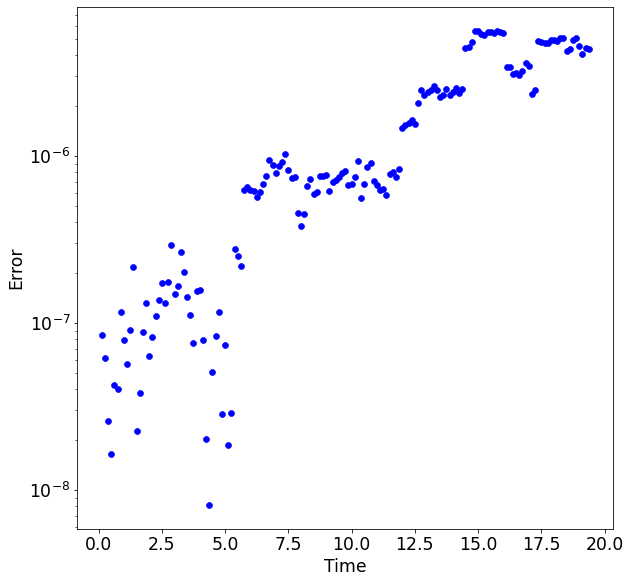

In [34]:
fig = plt.figure(2, figsize=[n*4.8,n*4.8])
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
# start = 0;
# end = 0;
# for i in range(nbins):
#     end += counts[i]
#     _ = ax.scatter(x0[data_ord_idx[start:end]],y0[data_ord_idx[start:end]],z0[data_ord_idx[start:end]], marker='*',lw=0.4)
#     start += counts[i]
#_ = ax.scatter(x0, y0, marker='+', lw=0.6, color='blue')
#_ = plt.quiver(x0, y0, vx0, vy0, color='lightblue')
_ = ax.scatter(error[0:155,0], error[0:155,1], lw=0.6, color='blue')
_ = ax.set_yscale('log')
#_ = plt.quiver(xf, yf, vxf, vyf, color='orange')
#_ = plt.vlines(0,-np.max(np.abs(y)),np.max(np.abs(y)), color='black', ls='--')
#_ = plt.hlines(0,-np.max(np.abs(x)),np.max(np.abs(x)), color='black', ls='--')
#_ = plt.legend(fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.xlabel('Time',fontsize=fs)
_ = plt.ylabel('Error',fontsize=fs)
a = 5
# _ = plt.xlim(-a,a);
# _ = plt.ylim(-a,a);
_ = plt.savefig('./cluster_error.png', bbox_inches='tight', format='png')

[False  True] [1874  174]
[False  True] [1990   58]


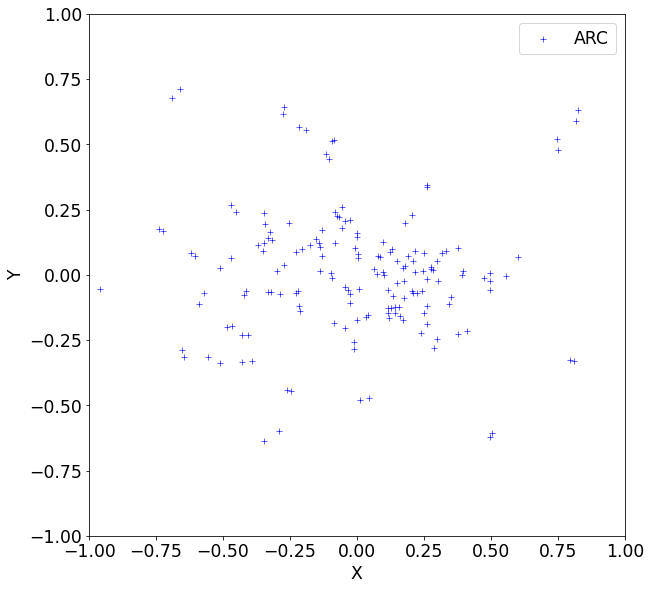

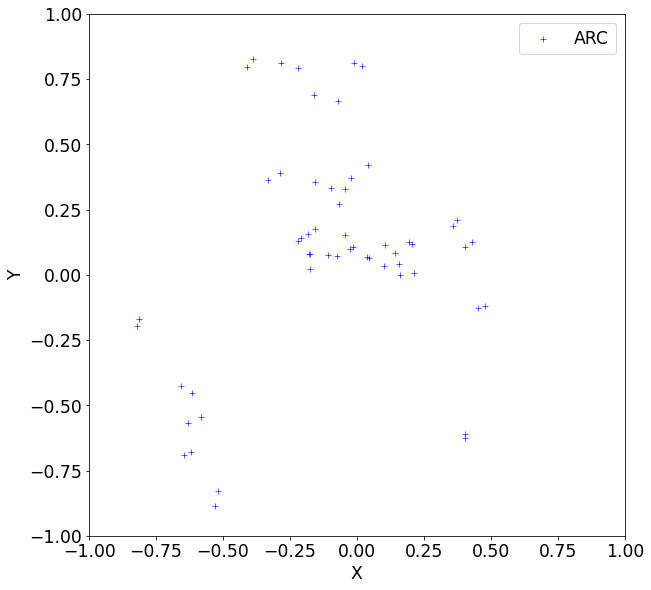

In [6]:
''' DECISION MAKING: PROVO COME MYRIAD (diviso 1000)'''
def dm_myriad(x,y,z,vx,vy,vz,m):
    U0 = -5.036985253881402e-01
    m_ava = np.average(m)
    Rcl = 2*N*m_ava/np.abs(U0)
    flag = np.empty_like(x, dtype=bool)
    for i in range(N):
        Rcrit = np.delete(Rcl * np.sqrt( N * (m[i] + m) * 0.5 )/1000, i)
        xr = np.delete(x - x[i], i)
        yr = np.delete(y - y[i], i)
        zr = np.delete(z - z[i], i)
        vrx = np.delete(vx - vx[i], i)
        vry = np.delete(vy - vy[i], i)
        vrz = np.delete(vz - vz[i], i)
        d = xr*xr + yr*yr + zr*zr
        flagi = (d<Rcrit) & (vrx*xr*vry*yr>0) & (vrz*zr*vry*yr>0)
        if(flagi.any()):
            flag[i] = True
        else:
            flag[i] = False
    a = np.unique(flag, return_counts=True)
    print(a[0], a[1])
    fig = plt.figure(rd.randint(0,100), figsize=[n*4.8,n*4.8])
    ax = fig.add_subplot()
#     ax = fig.add_subplot(projection='3d')
#     _ = ax.scatter(x0[~flag], y0[~flag], marker='+', lw=0.5, color='red', label='H6')
    _ = ax.scatter(x[flag], y[flag], marker='+', lw=0.6, color='blue', label='ARC')
    _ = plt.legend(fontsize=fs)
    _ = plt.xticks(fontsize=fs)
    _ = plt.yticks(fontsize=fs)
    _ = plt.xlabel('X',fontsize=fs)
    _ = plt.ylabel('Y',fontsize=fs)
    a = 1
    _ = plt.xlim(-a,a);
    _ = plt.ylim(-a,a);


dm_myriad(x0,y0,z0,vx0,vy0,vz0,m0)
dm_myriad(xf,yf,zf,vxf,vyf,vzf,mf)